In [350]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [457]:
df = pd.read_csv('Dataset\\houseprices_train.csv')
df[0:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [352]:
# Counting NA values of columns

for i in df.columns:
    print(f"{i} : ",df[i].isna().sum())


Id :  0
MSSubClass :  0
MSZoning :  0
LotFrontage :  259
LotArea :  0
Street :  0
Alley :  1369
LotShape :  0
LandContour :  0
Utilities :  0
LotConfig :  0
LandSlope :  0
Neighborhood :  0
Condition1 :  0
Condition2 :  0
BldgType :  0
HouseStyle :  0
OverallQual :  0
OverallCond :  0
YearBuilt :  0
YearRemodAdd :  0
RoofStyle :  0
RoofMatl :  0
Exterior1st :  0
Exterior2nd :  0
MasVnrType :  872
MasVnrArea :  8
ExterQual :  0
ExterCond :  0
Foundation :  0
BsmtQual :  37
BsmtCond :  37
BsmtExposure :  38
BsmtFinType1 :  37
BsmtFinSF1 :  0
BsmtFinType2 :  38
BsmtFinSF2 :  0
BsmtUnfSF :  0
TotalBsmtSF :  0
Heating :  0
HeatingQC :  0
CentralAir :  0
Electrical :  1
1stFlrSF :  0
2ndFlrSF :  0
LowQualFinSF :  0
GrLivArea :  0
BsmtFullBath :  0
BsmtHalfBath :  0
FullBath :  0
HalfBath :  0
BedroomAbvGr :  0
KitchenAbvGr :  0
KitchenQual :  0
TotRmsAbvGrd :  0
Functional :  0
Fireplaces :  0
FireplaceQu :  690
GarageType :  81
GarageYrBlt :  81
GarageFinish :  81
GarageCars :  0
GarageArea

In [395]:
# Dropping Columns with more than 50% NA values
df = df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','MasVnrType'],axis='columns')


In [438]:
# Predicting NA values of LotFrontage using regression

data = df[['MSSubClass','MSZoning','LotFrontage','LotArea']]
data_ = data.dropna()
dummies = pd.get_dummies(data_[['MSZoning']])
new_data = pd.concat([data_,dummies],axis='columns')

# Avoiding Dummy variable Trap
new_data_final = new_data.drop(['MSZoning', 'MSZoning_C (all)'],axis='columns')

X = new_data_final.drop('LotFrontage',axis='columns')
Y = new_data_final[['LotFrontage']]


In [441]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [442]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3844813802940412

In [333]:
import pickle

with open('model1' , 'wb') as f:
    pickle.dump(model,f)

In [443]:
with open('model1', 'rb') as f:
    m = pickle.load(f)

m.score(x_test,y_test)

# Predicting LotFrontage Values

x_data = data[data['LotFrontage'].isna()]
dummies_ = pd.get_dummies(x_data[['MSZoning']])
x_data = pd.concat([x_data,dummies_], axis='columns')
x_data_new = x_data.drop(['LotFrontage','MSZoning'],axis='columns')
y_predicted_values = m.predict(x_data_new)
y_predicted_values = y_predicted_values.astype(int)
y_predicted_values = np.array(y_predicted_values).flatten()


In [447]:
import math

df[:20]
temp = 0
temp_LotFrontage = []
for i in df['LotFrontage']:
    if math.isnan(i):
        temp_LotFrontage.append(y_predicted_values[temp])
        temp += 1
    else:
        temp_LotFrontage.append(int(i))
df['LotFrontage'] = temp_LotFrontage
df[:20]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,73,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [448]:
# Filling NA values for Garage Year Built
df['GarageYrBlt'] = df['YearBuilt']

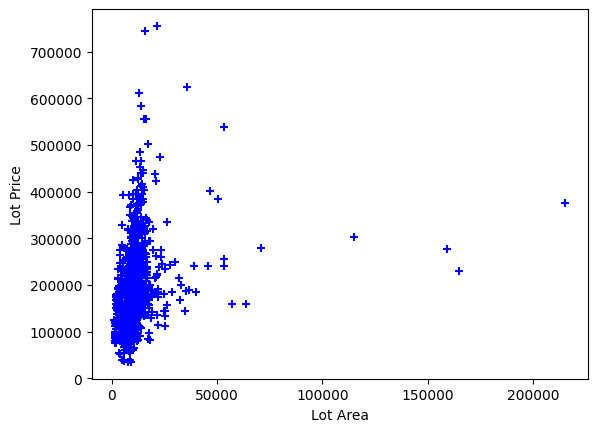

In [454]:
# The Dataframe is now mainly ready to be used

# plotting different features with price
plt.xlabel('Lot Area')
plt.ylabel('Lot Price')
plt.scatter(df['LotArea'],df['SalePrice'],color='blue',marker='+')
plt.show()

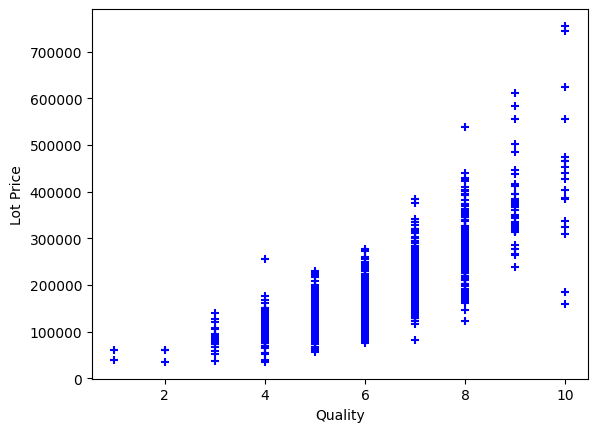

In [455]:
plt.xlabel('Quality')
plt.ylabel('Lot Price')
plt.scatter(df['OverallQual'],df['SalePrice'],color='blue',marker='+')
plt.show()